In [1]:
from qiskit import QuantumCircuit, pulse
from qiskit.qasm3 import dumps, ExperimentalFeatures, loads

circ = QuantumCircuit(1, 1)
circ.h(0)
circ.measure([0], [0])

circ.draw("mpl")

qasm_string_pre_calibration = dumps(circ, experimental=ExperimentalFeatures.SWITCH_CASE_V1)

with pulse.build() as h_q0:
    pulse.play(
        pulse.library.Gaussian(duration=256, amp=0.2, sigma=50, name="custom"),
        pulse.DriveChannel(0)
    )

circ.add_calibration("h", qubits=[0], schedule=h_q0)
h_q0.draw()

qasm_string_post_calibration = dumps(circ, experimental=ExperimentalFeatures.SWITCH_CASE_V1)

/Users/lukasvoss/anaconda3/envs/braket/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


In [2]:
qasm_string_pre_calibration == qasm_string_post_calibration

True

In [3]:
qasm_string_post_calibration

'OPENQASM 3;\ninclude "stdgates.inc";\nbit[1] c;\nqubit[1] q;\nh q[0];\nc[0] = measure q[0];\n'

/Users/lukasvoss/anaconda3/envs/braket/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


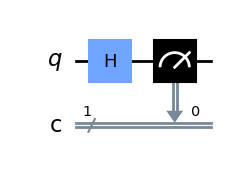

In [4]:
circuit = loads(qasm_string_post_calibration)
circuit.draw("mpl")

### Run QASM3 program on Braket QPU

In [5]:
# import the device module
from braket.aws import AwsDevice, AwsQuantumJob, AwsSession
from braket.ir.openqasm import Program
from braket import pulse

aws_session = AwsSession(default_bucket="amazon-braket-us-west-1-lukasvoss")

In [6]:
with open("pulse.qasm", "r") as pulse:
    pulse_qasm_string = pulse.read()

# choose the OQC device (Rigetti is currently under maintenance)
device = AwsDevice("arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy")

program = Program(source=pulse_qasm_string)

# You can also specify an optional s3 bucket location and number of shots,
# if you so choose, when running the program
s3_location = ("amazon-braket-my-bucket", "openqasm-tasks")

In [7]:
my_task = device.run(
    program,
    # s3_location,
    shots=100,
)

ValidationException: An error occurred (ValidationException) when calling the CreateQuantumTask operation: Parsing error: line 1:0 extraneous input ''OPENQASM 3.0;\ninclude "stdgates.inc";\nbit[1] c;\nqubit[1] q;\nh q[0];\nc[0] = measure q[0];\n'' expecting {<EOF>, 'cal', 'defcal', '#pragma braket', 'waveform', 'port', 'frame', 'OPENQASM', 'include', 'defcalgrammar', 'def', 'gate', 'extern', 'box', 'let', 'break', 'continue', 'if', 'end', 'return', 'for', 'while', PRAGMA, AnnotationKeyword, 'input', 'output', 'const', 'qreg', 'qubit', 'creg', 'bool', 'bit', 'int', 'uint', 'float', 'angle', 'complex', 'array', 'duration', 'stretch', 'gphase', 'inv', 'pow', 'ctrl', 'negctrl', 'durationof', 'delay', 'reset', 'measure', 'barrier', BooleanLiteral, '(', '-', '~', '!', ImaginaryLiteral, BinaryIntegerLiteral, OctalIntegerLiteral, DecimalIntegerLiteral, HexIntegerLiteral, Identifier, HardwareQubit, FloatLiteral, TimingLiteral, BitstringLiteral}
